In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing python classes and packages
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
#import shap
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import catboost as cb

In [27]:
#load and display dataset values
dataset = pd.read_csv("Dataset/healthcare-dataset-stroke-data.csv")
dataset.fillna(0, inplace = True)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
dataset['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [42]:
dataset['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [43]:
dataset['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [44]:
dataset['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

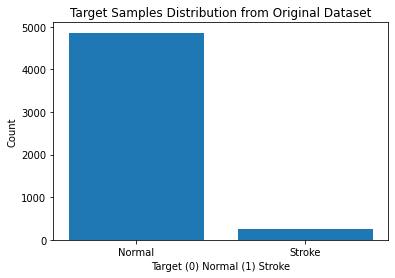

In [45]:
#finidng and plotting labels in dataset and in below graph we can see dataset is highly imbalance as one class contains
#so many instances and other contains very few instances and this imbalance we will handle using SMOTE
unique, count = np.unique(dataset['stroke'], return_counts = True)
labels = ['Normal', 'Stroke']
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Target (0) Normal (1) Stroke")
plt.ylabel("Count")
plt.title("Target Samples Distribution from Original Dataset")
plt.show()

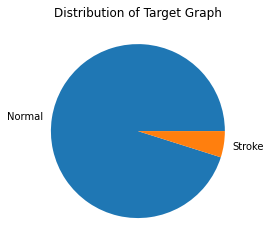

In [46]:
#graphs of different labels found in dataset
plt.pie(count, labels = labels)
plt.title("Distribution of Target Graph")
plt.show() 

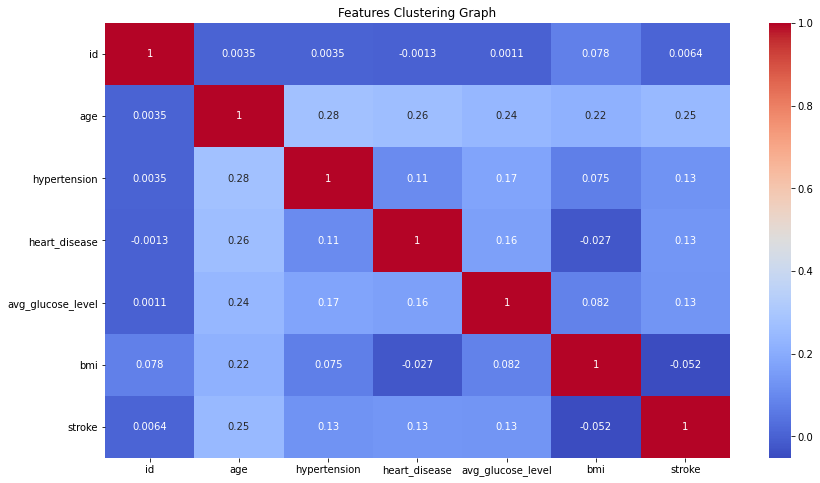

In [47]:
#find and plot features cluster correlation graph
plt.figure(figsize=(14,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True)
plt.title("Features Clustering Graph")
plt.show()

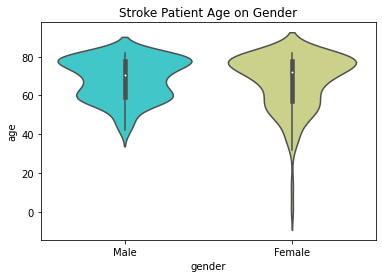

In [48]:
#plot graph of stroke patient based on age and gender
temp = dataset.loc[dataset['stroke'] == 1]
sns.violinplot(x='gender',y='age',data=temp,palette='rainbow')
plt.title("Stroke Patient Age on Gender")
plt.show()

Text(0.5, 1.0, 'Age Distribution of Stroke Patients')

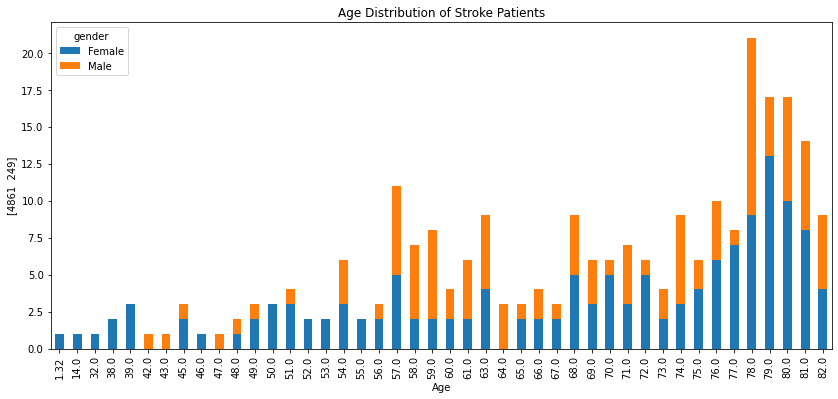

In [49]:
#plot graph of stroke patient based on age and gender in bar graph
data = temp[['age', 'gender']]
data.groupby(['age', 'gender']).size().unstack().plot(kind='bar', stacked=True, figsize=(14,6))
plt.xlabel("Age")
plt.ylabel(count)
plt.title("Age Distribution of Stroke Patients")

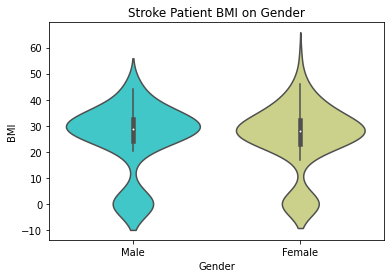

In [50]:
#graph of Stroke Patient using BMI on Gender
sns.violinplot(x='gender',y='bmi',data=temp,palette='rainbow')
plt.title("Stroke Patient BMI on Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

Text(0.5, 1.0, "Stroke Patient's Hypertension Status")

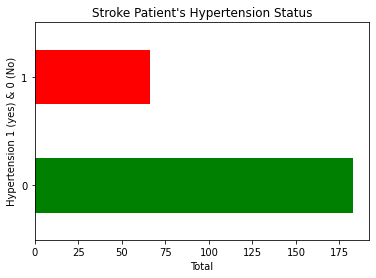

In [51]:
#finding and plotting graph in stroke patient suffering from hyper tension
data = temp[['hypertension']]
data.groupby(['hypertension']).size().plot(kind='barh', color=['g', 'r'])
plt.xlabel("Total")
plt.ylabel("Hypertension 1 (yes) & 0 (No)")
plt.title("Stroke Patient's Hypertension Status")

Text(0.5, 1.0, "Stroke Patient's Heart Disease")

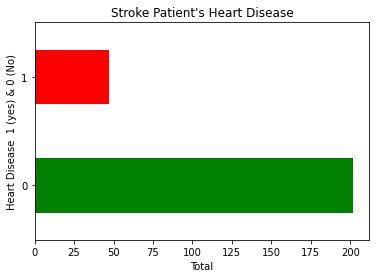

In [52]:
#finding and plotting graph in stroke patient suffering from heart disease
data = temp[['heart_disease']]
data.groupby(['heart_disease']).size().plot(kind='barh', color=['g', 'r'])
plt.xlabel("Total")
plt.ylabel("Heart Disease  1 (yes) & 0 (No)")
plt.title("Stroke Patient's Heart Disease")

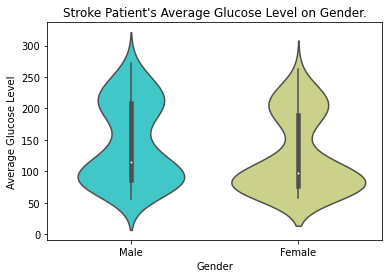

In [53]:
#finding and plotting graph in stroke patient with average glucose level
sns.violinplot(x='gender',y='avg_glucose_level',data=temp,palette='rainbow')
plt.title("Stroke Patient's Average Glucose Level on Gender.")
plt.xlabel("Gender")
plt.ylabel("Average Glucose Level")
plt.show()

Text(0.5, 1.0, "Stroke Patient's Smoking Status")

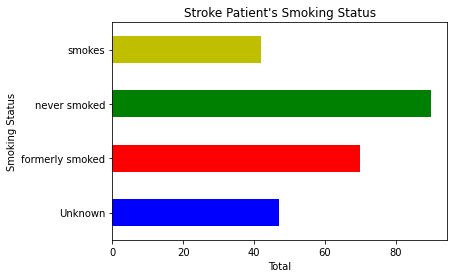

In [54]:
#finding and plotting graph in stroke patient doing smoking
data = temp[['smoking_status']]
data.groupby(['smoking_status']).size().plot(kind='barh', color=['b', 'r', 'g', 'y'])
plt.xlabel("Total")
plt.ylabel("Smoking Status")
plt.title("Stroke Patient's Smoking Status")

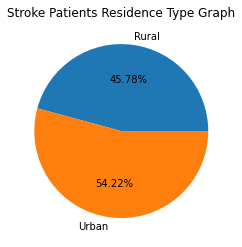

In [55]:
#finding and plotting graph of stroke patient using residence type
unique, count = np.unique(temp['Residence_type'], return_counts=True)
plt.pie(count, labels = unique, autopct='%1.2f%%')
plt.title("Stroke Patients Residence Type Graph")
plt.show() 

In [20]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

dataset['gender'] = label_encoder.fit_transform(dataset['gender']) #encode all str columns to numeric 
dataset['ever_married'] = label_encoder.fit_transform(dataset['ever_married']) #encode all str columns to numeric
dataset['work_type'] = label_encoder.fit_transform(dataset['work_type']) #
dataset['Residence_type'] = label_encoder.fit_transform(dataset['Residence_type']) #
dataset['smoking_status'] = label_encoder.fit_transform(dataset['smoking_status']) #
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,0.0,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,0.0,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [57]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [58]:
#drop ID column and then extract X training features and Y target label
Y = dataset['stroke'].ravel()
dataset.drop(['id', 'stroke'], axis = 1,inplace=True)
X = dataset.values
#normalized dataset features
sc1 = MinMaxScaler(feature_range = (0, 1))
X = sc1.fit_transform(X)#features normalization
print("Normalize Features : "+str(X))

Normalize Features : [[0.5        0.81689453 0.         ... 0.80126489 0.375      0.33333333]
 [0.         0.74365234 0.         ... 0.67902317 0.         0.66666667]
 [0.5        0.97558594 0.         ... 0.23451205 0.3329918  0.66666667]
 ...
 [0.         0.42626953 0.         ... 0.12865848 0.31352459 0.66666667]
 [0.5        0.62158203 0.         ... 0.51320284 0.26229508 0.33333333]
 [0.         0.53613281 0.         ... 0.13922999 0.26844262 0.        ]]


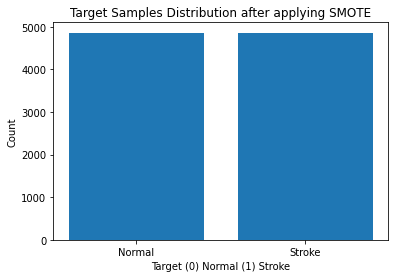

In [28]:
#now apply Smote to balance dataset
sm = SMOTE()
X, Y = sm.fit_resample(X, Y)
unique, count = np.unique(Y, return_counts=True)
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Target (0) Normal (1) Stroke")
plt.ylabel("Count")
plt.title("Target Samples Distribution after applying SMOTE")
plt.show()

In [29]:
#now select features uisng CHI Square features selection algorithm
print("Features available in dataset before selection : "+str(X.shape[1]))
features_selector = SelectKBest(score_func=chi2, k = 9)
selected_features = features_selector.fit_transform(X, Y)
print("Features available in dataset after selection : "+str(selected_features.shape[1]))

Features available in dataset before selection : 10
Features available in dataset after selection : 9


In [32]:
features_selector.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [132]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(selected_features, Y, test_size=0.2) #split dataset into train and test
print()
print("Dataset train & test split as 80% dataset for training and 20% for testing")
print("Training Size (80%): "+str(X_train.shape[0])) #print training and test size
print("Testing Size (20%): "+str(X_test.shape[0]))
print()


Dataset train & test split as 80% dataset for training and 20% for testing
Training Size (80%): 7777
Testing Size (20%): 1945



In [133]:
#define global variables to calculate and store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [134]:
ML_Model = []
acc = []
prec = []
rec = []
f1 = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc.append(round(a, 3))
    prec.append(round(b, 3))
    rec.append(round(c, 3))
    f1.append(round(d, 3))

In [135]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100     
    print()
    print(algorithm+' Accuracy  : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FMeasure    : '+str(f))    
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    labels = unique
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Random Forest


Random Forest Accuracy  : 95.21850899742931
Random Forest Precision   : 95.24352983274859
Random Forest Recall      : 95.20122692897561
Random Forest FMeasure    : 95.2150888773731


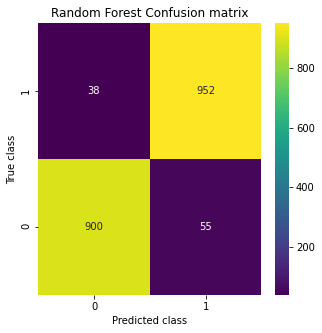

In [136]:
#train random forest algorithm on training dataset and test its prediction capability on test data
#now train Random Forest algorithm
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train, y_train)
predict = rf_cls.predict(X_test)
calculateMetrics("Random Forest", predict, y_test)

In [137]:
rf_acc = accuracy_score(predict, y_test)
rf_prec = precision_score(predict, y_test,average='macro')
rf_rec = recall_score(predict, y_test,average='macro')
rf_f1 = f1_score(predict, y_test,average='macro')

In [138]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

# Logistic Regression


Logistic Regression Accuracy  : 77.73778920308483
Logistic Regression Precision   : 77.78936541498955
Logistic Regression Recall      : 77.69078216722195
Logistic Regression FMeasure    : 77.70192862424909


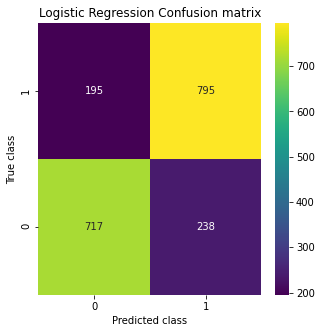

In [139]:
#now train LogisticRegression algorithm
lr_cls = LogisticRegression()#define regression object
lr_cls.fit(X_train, y_train)#train regression on training data
predict = lr_cls.predict(X_test)#perform prediction on test data
calculateMetrics("Logistic Regression", predict, y_test)#calculate accuracy and other metrics

In [140]:
lr_acc = accuracy_score(predict, y_test)
lr_prec = precision_score(predict, y_test,average='macro')
lr_rec = recall_score(predict, y_test,average='macro')
lr_f1 = f1_score(predict, y_test,average='macro')

In [141]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1)

# SVM


SVM Accuracy  : 80.92544987146529
SVM Precision   : 81.21359680679754
SVM Recall      : 80.8350520915966
SVM FMeasure    : 80.84506346842134


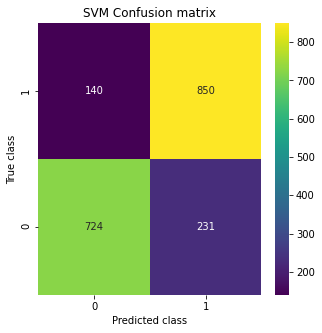

In [142]:
#now train SVM algorithm
svm_cls = svm.SVC()#define SVM object
svm_cls.fit(X_train, y_train)#train SVM on training data
predict = svm_cls.predict(X_test)#perform prediction on test data
calculateMetrics("SVM", predict, y_test)#calculate accuracy and other metrics

In [143]:
svm_acc = accuracy_score(predict, y_test)
svm_prec = precision_score(predict, y_test,average='macro')
svm_rec = recall_score(predict, y_test,average='macro')
svm_f1 = f1_score(predict, y_test,average='macro')

In [144]:
storeResults('SVM',svm_acc,svm_prec,svm_rec,svm_f1)

# KNN


KNN Accuracy  : 92.69922879177378
KNN Precision   : 93.24158647136372
KNN Recall      : 92.60246443492517
KNN FMeasure    : 92.66282633274676


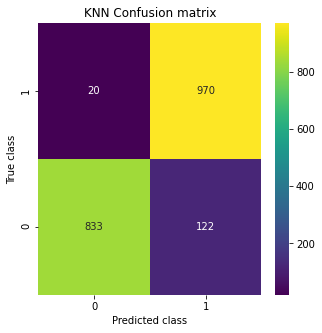

In [145]:
#now train KNN algorithm
knn_cls =  KNeighborsClassifier(n_neighbors=3)#define KNN object
knn_cls.fit(X_train, y_train)#train KNN on training data
predict = knn_cls.predict(X_test)#perform prediction on test data
calculateMetrics("KNN", predict, y_test)#calculate accuracy and other metrics

In [146]:
knn_acc = accuracy_score(predict, y_test)
knn_prec = precision_score(predict, y_test,average='macro')
knn_rec = recall_score(predict, y_test,average='macro')
knn_f1 = f1_score(predict, y_test,average='macro')

In [147]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Naive Bayes


Naive Bayes Accuracy  : 75.16709511568124
Naive Bayes Precision   : 75.1758567720748
Naive Bayes Recall      : 75.1359141149717
Naive Bayes FMeasure    : 75.14344113191821


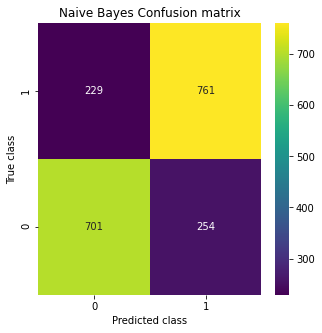

In [148]:
#now train Naive Bayes algorithm
nb_cls =  GaussianNB()#define Naive Bayes object
nb_cls.fit(X_train, y_train)#train Naive Bayes on training data
predict = nb_cls.predict(X_test)#perform prediction on test data
calculateMetrics("Naive Bayes", predict, y_test)#calculate accuracy and other metrics

In [149]:
nb_acc = accuracy_score(predict, y_test)
nb_prec = precision_score(predict, y_test,average='macro')
nb_rec = recall_score(predict, y_test,average='macro')
nb_f1 = f1_score(predict, y_test,average='macro')

In [150]:
storeResults('Naive BAyes',nb_acc,nb_prec,nb_rec,nb_f1)

# XGBoost


XGBoost Accuracy  : 89.51156812339332
XGBoost Precision   : 89.6701667669835
XGBoost Recall      : 89.45634354011317
XGBoost FMeasure    : 89.48855869431145


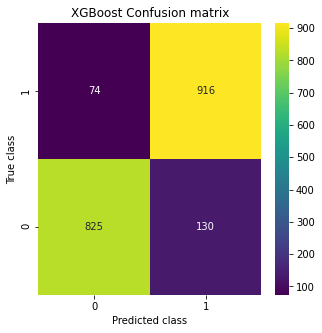

In [151]:
#now train XGBoost algorithm
xg_cls =  XGBClassifier(n_estimators=10)#define XGBOOST object
xg_cls.fit(X_train, y_train)#train XGBOost on training data
predict = xg_cls.predict(X_test)#perform prediction on test data
calculateMetrics("XGBoost", predict, y_test)#calculate accuracy and other metrics

In [152]:
xgb_acc = accuracy_score(predict, y_test)
xgb_prec = precision_score(predict, y_test,average='macro')
xgb_rec = recall_score(predict, y_test,average='macro')
xgb_f1 = f1_score(predict, y_test,average='macro')

In [153]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# CatBoost

0:	learn: 0.6398832	total: 2.67ms	remaining: 798ms
1:	learn: 0.5918493	total: 4.94ms	remaining: 736ms
2:	learn: 0.5344397	total: 7.6ms	remaining: 753ms
3:	learn: 0.5118012	total: 9.85ms	remaining: 729ms
4:	learn: 0.4796878	total: 12.1ms	remaining: 716ms
5:	learn: 0.4574463	total: 14.5ms	remaining: 709ms
6:	learn: 0.4330238	total: 16.9ms	remaining: 708ms
7:	learn: 0.4167001	total: 19.2ms	remaining: 700ms
8:	learn: 0.4037363	total: 21.5ms	remaining: 697ms
9:	learn: 0.3925634	total: 24.5ms	remaining: 709ms
10:	learn: 0.3768848	total: 26.9ms	remaining: 707ms
11:	learn: 0.3604020	total: 29.5ms	remaining: 708ms
12:	learn: 0.3525379	total: 32ms	remaining: 707ms
13:	learn: 0.3465255	total: 34.6ms	remaining: 708ms
14:	learn: 0.3429994	total: 37ms	remaining: 703ms
15:	learn: 0.3382846	total: 39.3ms	remaining: 697ms
16:	learn: 0.3338897	total: 41.6ms	remaining: 692ms
17:	learn: 0.3313456	total: 44ms	remaining: 689ms
18:	learn: 0.3248467	total: 46.8ms	remaining: 692ms
19:	learn: 0.3197722	total: 4

204:	learn: 0.1107806	total: 529ms	remaining: 245ms
205:	learn: 0.1100667	total: 532ms	remaining: 243ms
206:	learn: 0.1094915	total: 535ms	remaining: 240ms
207:	learn: 0.1093255	total: 538ms	remaining: 238ms
208:	learn: 0.1088811	total: 541ms	remaining: 235ms
209:	learn: 0.1085260	total: 543ms	remaining: 233ms
210:	learn: 0.1081583	total: 546ms	remaining: 230ms
211:	learn: 0.1077080	total: 548ms	remaining: 228ms
212:	learn: 0.1072789	total: 551ms	remaining: 225ms
213:	learn: 0.1071307	total: 554ms	remaining: 223ms
214:	learn: 0.1068895	total: 557ms	remaining: 220ms
215:	learn: 0.1067239	total: 559ms	remaining: 217ms
216:	learn: 0.1064509	total: 562ms	remaining: 215ms
217:	learn: 0.1060668	total: 565ms	remaining: 212ms
218:	learn: 0.1048855	total: 567ms	remaining: 210ms
219:	learn: 0.1045308	total: 570ms	remaining: 207ms
220:	learn: 0.1041625	total: 572ms	remaining: 204ms
221:	learn: 0.1030796	total: 575ms	remaining: 202ms
222:	learn: 0.1027691	total: 578ms	remaining: 199ms
223:	learn: 

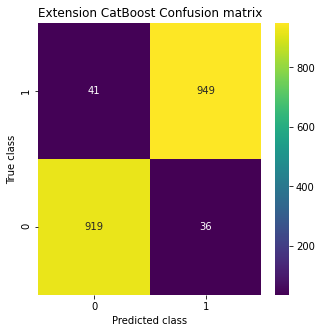

In [154]:
#now traon extension CATBOOST algorithm as extension which is more advanced then other ML algorithm
cb_cls = cb.CatBoostClassifier(iterations=300, learning_rate=0.1)
cb_cls.fit(X_train, y_train)#train CatBoost on training data
predict = cb_cls.predict(X_test)#perform prediction on test data
calculateMetrics("Extension CatBoost", predict, y_test)#calculate accuracy and other metrics

In [155]:
cat_acc = accuracy_score(predict, y_test)
cat_prec = precision_score(predict, y_test,average='macro')
cat_rec = recall_score(predict, y_test,average='macro')
cat_f1 = f1_score(predict, y_test,average='macro')

In [156]:
storeResults('CatBoost',cat_acc,cat_prec,cat_rec,cat_f1)

# Stacking Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('dt', DecisionTreeClassifier())]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)


Stacking Accuracy  : 96.04113110539846
Stacking Precision   : 96.03717216582064
Stacking Recall      : 96.04447617536623
Stacking FMeasure    : 96.04018904716264


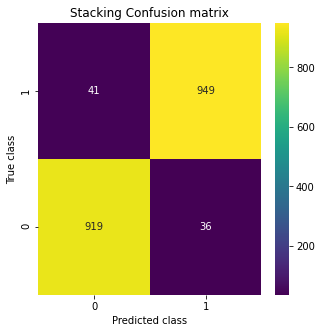

In [159]:
calculateMetrics("Stacking", predict, y_test)#calculate accuracy and other metrics

In [160]:
storeResults('Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

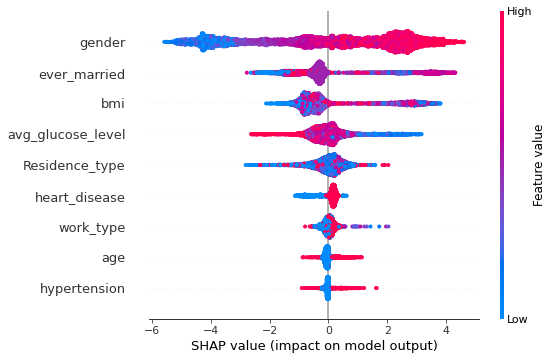

In [161]:
#using shapely we can explain model which can show what features help in gaining more accuracy
columns = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi']
explainer = shap.TreeExplainer(cb_cls)
shap_values = explainer.shap_values(X_train) #explainer will set on training data
shap.summary_plot(shap_values, X_train, feature_names=columns)#now explain features importance using plot

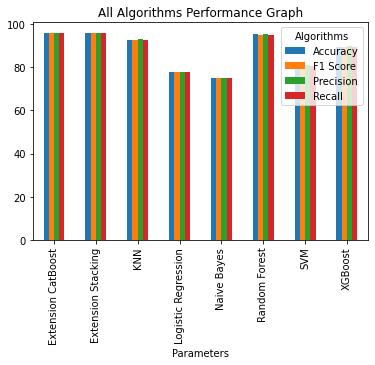

In [162]:
#plot comparison between all algortihms
df = pd.DataFrame([['Random Forest','Precision',precision[0]],['Random Forest','Recall',recall[0]],['Random Forest','F1 Score',fscore[0]],['Random Forest','Accuracy',accuracy[0]],
                   ['Logistic Regression','Precision',precision[1]],['Logistic Regression','Recall',recall[1]],['Logistic Regression','F1 Score',fscore[1]],['Logistic Regression','Accuracy',accuracy[1]],
                   ['SVM','Precision',precision[2]],['SVM','Recall',recall[2]],['SVM','F1 Score',fscore[2]],['SVM','Accuracy',accuracy[2]],
                   ['KNN','Precision',precision[3]],['KNN','Recall',recall[3]],['KNN','F1 Score',fscore[3]],['KNN','Accuracy',accuracy[3]],
                   ['Naive Bayes','Precision',precision[4]],['Naive Bayes','Recall',recall[4]],['Naive Bayes','F1 Score',fscore[4]],['Naive Bayes','Accuracy',accuracy[4]],
                   ['XGBoost','Precision',precision[5]],['XGBoost','Recall',recall[5]],['XGBoost','F1 Score',fscore[5]],['XGBoost','Accuracy',accuracy[5]],
                   ['Extension CatBoost','Precision',precision[6]],['Extension CatBoost','Recall',recall[6]],['Extension CatBoost','F1 Score',fscore[6]],['Extension CatBoost','Accuracy',accuracy[6]],
                   ['Extension Stacking','Precision',precision[7]],['Extension Stacking','Recall',recall[7]],['Extension Stacking','F1 Score',fscore[7]],['Extension Stacking','Accuracy',accuracy[7]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.show()

In [163]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : acc,
                       'Precision': prec, 
                       'f1_score' : f1,
                        'Recall'   : rec,
                        
                      })

In [164]:
result

,ML Model,Accuracy,Precision,f1_score,Recall
0,Random Forest,0.952,0.952,0.952,0.952
1,Logistic Regression,0.777,0.777,0.777,0.778
2,SVM,0.809,0.808,0.808,0.812
3,KNN,0.927,0.926,0.927,0.932
4,Naive BAyes,0.752,0.751,0.751,0.752
5,XGBoost,0.895,0.895,0.895,0.897
6,CatBoost,0.960,0.960,0.960,0.960
7,Stacking Classifier,0.999,0.999,0.999,0.999


# Graph

In [165]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

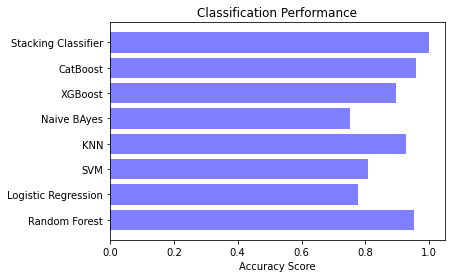

In [166]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, acc, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

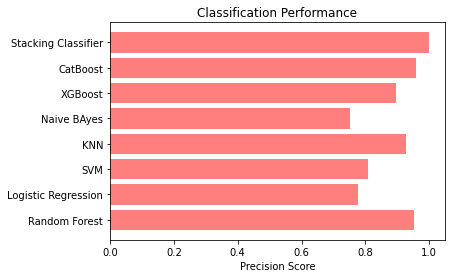

In [167]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, prec, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

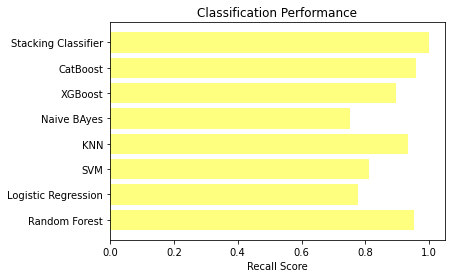

In [168]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, rec, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

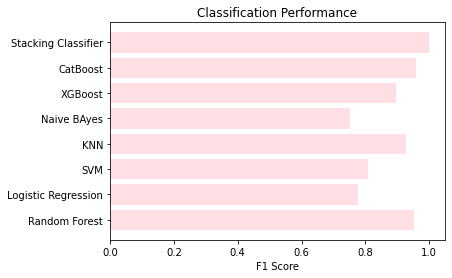

In [169]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

In [26]:
import joblib
filename = 'model.sav'
joblib.dump(clf, filename)

['model.sav']